In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import warnings
warnings.filterwarnings('ignore')

import re
import jax.numpy as jnp
from jax import grad, jit, partial
import ticktack
from ticktack import fitting
from tqdm import tqdm
import scipy

rcParams['figure.figsize'] = (8.0, 4.0)

In [2]:
cbm = ticktack.load_presaved_model('Guttler14', production_rate_units = 'atoms/cm^2/s')
cf = fitting.CarbonFitter(cbm)
cf.load_data('inject-recovery.csv')

In [3]:
@jit
def gauss(t):
    start = jnp.nanmin(t)
    end = jnp.nanmax(t)
    mid = start/2+end/2
    prod =  cf.steady_state_production + 0.2 * cf.steady_state_production * jnp.exp(-1/2*((t-775)/3)**2.)
    return prod

In [4]:
cbm = ticktack.load_presaved_model('Guttler14', production_rate_units = 'atoms/cm^2/s')
cf = fitting.CarbonFitter(cbm)
cf.load_data('inject-recovery.csv')
cf.prepare_function(use_control_points=True, interp='gp')

In [5]:
%%time
soln = cf.fit_cp(low_bound=0., gp=True)

CPU times: user 53 s, sys: 953 ms, total: 54 s
Wall time: 52.2 s


In [6]:
soln.message

'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'

In [7]:
print("total likelihood: ", cf.gp_likelihood(soln.x))
print("gp likelihood: ", cf.gp_neg_log_likelihood(soln.x))
print("chi2: ", cf.loss_chi2(soln.x))

total likelihood:  22.09855763697552
gp likelihood:  22.095999045601832
chi2:  0.0025585913736884966


Text(0.5, 1.0, 'Gaussian production rate')

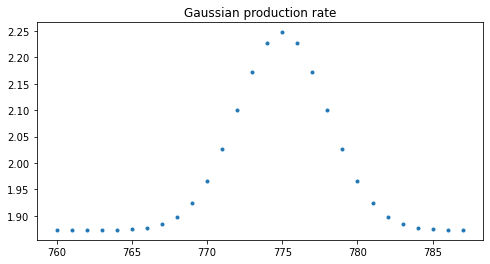

In [8]:
t = cf.control_points_time
true_cp = gauss(t)
plt.plot(t, gauss(t), ".")
plt.title('Gaussian production rate')

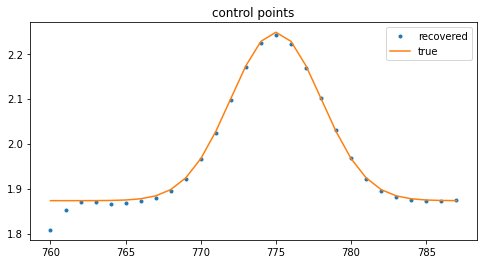

In [10]:
plt.plot(t, soln.x[:-1], ".")
plt.plot(t, true_cp)
plt.title("control points");
plt.legend(["recovered", "true"]);

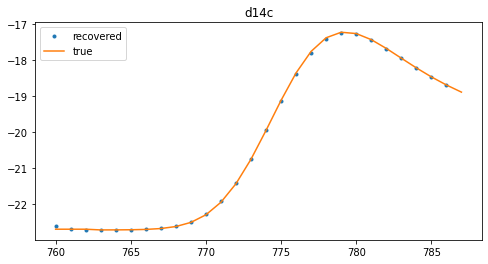

In [11]:
plt.plot(cf.time_data[:-1], cf.dc14(soln.x), ".")
plt.plot(cf.time_data, cf.d14c_data)
plt.legend(["recovered", 'true']);
plt.title("d14c");